In [7]:
import os

import numpy as np
from PIL import Image

os.getcwd()

'/mnt/2547d4d7-6732-4154-b0e1-17b0c1e0c565/Document-2/Projet2/Stage/workspace/jump_models'

In [3]:
def robust_convert_to_8bit(img, percentile=1.0):
    """Convert a array to a 8-bit image by min percentile normalisation and clipping."""
    img = img.astype(np.float32)
    img = (img - np.percentile(img, percentile)) / (
        np.percentile(img, 100 - percentile) - np.percentile(img, percentile) + np.finfo(float).eps
    )
    img = np.clip(img, 0, 1)
    img = (img * 255).astype(np.uint8)
    return img


def crop_min_resolution(img, min_resolution_x=970, min_resolution_y=970):
    """Crop the image to the minimum resolution."""
    if min_resolution_x <= 0 or min_resolution_x > img.shape[0]:
        min_resolution_x = img.shape[0]

    if min_resolution_y <= 0 or min_resolution_y > img.shape[1]:
        min_resolution_y = img.shape[1]

    x_start = img.shape[0] // 2 - min_resolution_x // 2
    x_end = x_start + min_resolution_x
    y_start = img.shape[1] // 2 - min_resolution_y // 2
    y_end = y_start + min_resolution_y

    return img[x_start:x_end, y_start:y_end]


def image_processing(img_arr, min_resolution_x=768, min_resolution_y=768, percentile=1.0):
    cropped_img = crop_min_resolution(img_arr, min_resolution_x=min_resolution_x, min_resolution_y=min_resolution_y)
    processed_img = robust_convert_to_8bit(cropped_img, percentile=percentile)
    return processed_img

In [24]:
source = "source_1"
plate = "UL001719"
well = "W25"
site = "1"
channel = "RNA"
tiff_file = "/home/gwatk/Downloads/r23c25f01p01-ch5sk1fk1fl1.tiff"
output_format = f"{source}__{plate}__{well}__{site}__{channel}.png"
output = f"../cpjump1/jump/images/source_1/Batch5_20221030/UL001719/{output_format}"

In [25]:
img_arr = np.array(Image.open(tiff_file))

In [26]:
img_arr_p = image_processing(img_arr)

In [27]:
img = Image.fromarray(img_arr_p, mode="L")

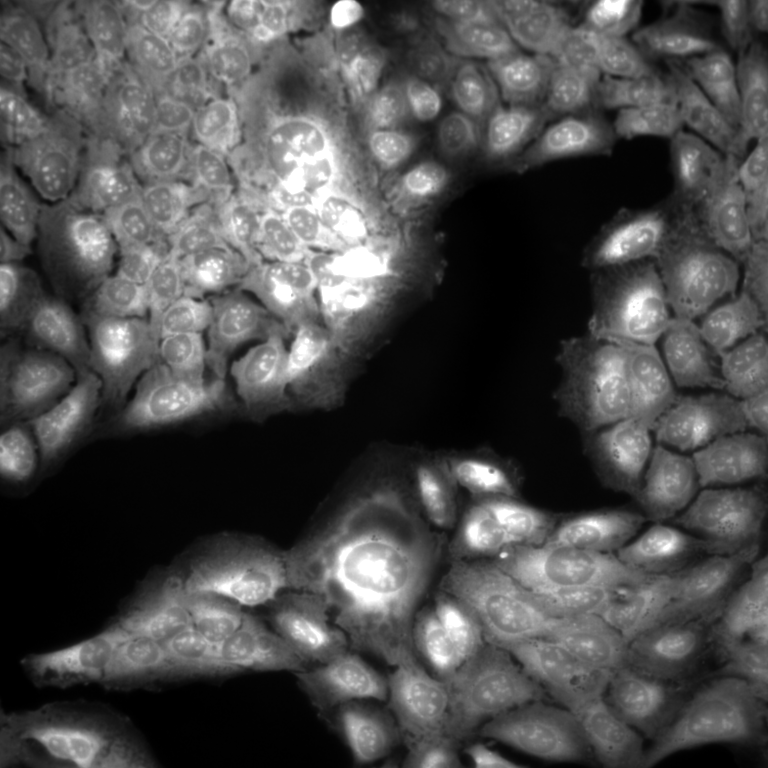

In [28]:
img

In [29]:
img.save(output)